## Genre classification on Movies dataset (Multi-Label Classification)

#### Objective: This is multi label classification problem where we are classifying the genres of the movies based on the overview/summary associated with it.

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import requests
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
import scipy.sparse
import plotly.express as px
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict, KFold

#### 1. Fetching data using an API:

The data was fetched from the website called "The movies database".

In [2]:
#Creating an empty dataframe to append the retrieved data.
#df = pd.DataFrame()
#df

Empty DataFrame
Columns: []
Index: []

In [4]:
#for i in range(1,447):
    #response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=3da5f481becb36b6724c48eff5acd259&page={}'.format(i))
    #temp_df = pd.DataFrame(response.json()['results']).head(10)[['id','title','overview','genre_ids','popularity','release_date','vote_average','vote_count']]
    #df = df.append(temp_df, ignore_index = True)
    

In [5]:
#df.head()

id                                        title  \
0        238                                The Godfather   
1        278                     The Shawshank Redemption   
2        240                        The Godfather Part II   
3        424                             Schindler's List   
4      19404                  Dilwale Dulhania Le Jayenge   
...      ...                                          ...   
4455   18955                                         Coco   
4456   40264                                Vampires Suck   
4457   10304  Starship Troopers 2: Hero of the Federation   
4458    9708                               The Wicker Man   
4459  400411                                      Satanic   

                                               overview          genre_ids  \
0     Spanning the years 1945 to 1955, a chronicle o...           [18, 80]   
1     Framed in the 1940s for the double murder of h...           [18, 80]   
2     In the continuing saga of the Corleone crime f...           [18, 80]   
3     The true story of how businessman Oskar Schind...    [18, 36, 10752]   
4     Raj is a rich, carefree, happy-go-lucky second...    [35, 18, 10749]   
...                                                 ...                ...   
4455  Coco is a French comedy released in 2009 and p...               [35]   
4456  Becca, an anxious, non-vampire teen is torn be...           [27, 35]   
4457  In the sequel to Paul Verhoeven's loved/revile...  [12, 27, 28, 878]   
4458  A sheriff investigating the disappearance of a...     [27, 9648, 53]   
4459  Four friends on their way to Coachella stop of...     [27, 9648, 53]   

      popularity release_date  vote_average  vote_count  
0        125.465   1972-03-14         8.710       18937  
1        103.805   1994-09-23         8.704       24918  
2         69.947   1974-12-20         8.590       11436  
3         58.949   1993-12-15         8.571       14783  
4         36.831   1995-10-20         8.546        4277  
...          ...          ...           ...         ...  
4455       9.485   2009-07-21         4.294         498  
4456      17.999   2010-08-18         4.292        1179  
4457      20.422   2004-04-24         4.295         521  
4458      17.276   2006-08-31         4.279        1208  
4459       8.709   2016-07-01         4.268         377  

[4460 rows x 8 columns]

In [6]:
#df.to_csv('movies.csv')

#### Attributes of dataset:
1. title: Name of the movie.
2. overview: summary/description of the movie.
3. Genre_ids: Each movie is associated with multiple genre ids.
4. popularity: a score which denotes how popular the movie is. This metric is evaluated based on box office collection, number of tickets sold
5. release_date: The date at which movie was released.
6. vote_average: The mean of all the votes the movie got.
7. vote_count: The number of counts the movie received.
8. id: A unique id to represent each movie



## -------------------------------------------------------------------------------------------------------------------------------------

#### 2. Data Exploration:

In [2]:
df = pd.read_csv("Movies dataset for genre prediction.csv")

In [3]:
df.head()

id                        title  \
0    238                The Godfather   
1    278     The Shawshank Redemption   
2    240        The Godfather Part II   
3    424             Schindler's List   
4  19404  Dilwale Dulhania Le Jayenge   

                                            overview        genre_ids  \
0  Spanning the years 1945 to 1955, a chronicle o...         [18, 80]   
1  Framed in the 1940s for the double murder of h...         [18, 80]   
2  In the continuing saga of the Corleone crime f...         [18, 80]   
3  The true story of how businessman Oskar Schind...  [18, 36, 10752]   
4  Raj is a rich, carefree, happy-go-lucky second...  [35, 18, 10749]   

   popularity release_date  vote_average  vote_count  
0     125.465    3/14/1972         8.710       18937  
1     103.805    9/23/1994         8.704       24918  
2      69.947   12/20/1974         8.590       11436  
3      58.949   12/15/1993         8.571       14783  
4      36.831   10/20/1995         8.546        4277

In [5]:
df.shape

(4460, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4460 non-null   int64  
 1   title         4460 non-null   object 
 2   overview      4460 non-null   object 
 3   genre_ids     4460 non-null   object 
 4   popularity    4460 non-null   float64
 5   release_date  4460 non-null   object 
 6   vote_average  4460 non-null   float64
 7   vote_count    4460 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 278.9+ KB


In [6]:
df.isnull().sum()

id              0
title           0
overview        0
genre_ids       0
popularity      0
release_date    0
vote_average    0
vote_count      0
dtype: int64

In [7]:
df.describe()

id   popularity  vote_average    vote_count
count  4.460000e+03  4460.000000   4460.000000   4460.000000
mean   1.777045e+05    25.579645      6.648889   1989.021076
std    2.364175e+05    41.595623      0.774129   3121.030993
min    1.100000e+01     0.600000      4.268000    300.000000
25%    9.963000e+03    12.491500      6.116750    472.000000
50%    3.331900e+04    17.056500      6.663500    845.000000
75%    3.345342e+05    25.881500      7.208000   1982.250000
max    1.140066e+06  1362.272000      8.710000  34739.000000

Observations: 
1. The dataset collected has 4460 rows and 8 columns.
2. Basic exploration on the data has been performed and it can be noted that the data has absolutely no missing values.

## -------------------------------------------------------------------------------------------------------------------------------------

#### 3. Data cleaning:
This step involves cleaning all the necessary columns and making the data suitable for our analysis.

#### 3 (i) Examine 'Overview' column:

Since overview is the main feature used for prediction this attributes needs to be cleaned before our analysis. Cleaning involves:
1. Converting the text to lower case.
2. Removing punctuation marks and numbers from the text.
3. Convert the text to tokens(nothing but splitting the text of the sentence into individual words).
4. Removing stop words from the text. 
5. Perform Lemmatization to convert the word to root form.
6. And last, join the tokens back.

The result of this opearation is a clean text with no punctuations, stopwords. Removing unncessary elements from our text makes the analysis, removes noise and helps us generate meaninful patterns and insights from the data.

In [8]:
def clean_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

df['cleaned_overview_movie'] = df['overview'].apply(clean_text)

In [9]:
df.head(2)

id                     title  \
0  238             The Godfather   
1  278  The Shawshank Redemption   

                                            overview genre_ids  popularity  \
0  Spanning the years 1945 to 1955, a chronicle o...  [18, 80]     125.465   
1  Framed in the 1940s for the double murder of h...  [18, 80]     103.805   

  release_date  vote_average  vote_count  \
0    3/14/1972         8.710       18937   
1    9/23/1994         8.704       24918   

                              cleaned_overview_movie  
0  spanning year chronicle fictional italianameri...  
1  framed double murder wife lover upstanding ban...

#### 3 (ii): Examine 'Genre_ids' column:

Genre-id is our predictor. Each movie has multiple genres associated with it. And hence it has multiple labels. Our objective is to find the number of unique values this attribute has and, this particular attribute has numeric values which is not much interpretable hence we are going to replace the numeric values with the appropriate text. 

In [11]:
genres = df['genre_ids']
# Flatten the list of genres across all rows, handling string representations of lists
# using ast.literal_eval to safely convert strings to lists
all_genres = sum([ast.literal_eval(genre) if isinstance(genre, str) else genre for genre in genres], [])
# convert the flattened list to a set calculate the length of the set. 
unique_genres_count = len(set(all_genres))
unique_genres_count

18

In [12]:
# print all the unique values
unique_genres = set(all_genres)
print(unique_genres)

{10752, 10402, 35, 36, 37, 12, 14, 878, 80, 16, 18, 9648, 10770, 53, 27, 28, 10749, 10751}


There are 18 unique genres in our dataset. This type of representation is not much informative. Upon investigation 'TMBD' has released what this genre-ids depict:
1. Action-28
2. Adventure-12
3. Animation-16
4. Comedy-35
5. Crime-80
6. Documentary-99
7. Drama-18
8. Family-10751
9. Fantasy-14
10. History-36
11. Horror-27
12. Music-10402
13. Mystery-9648
14. Romance-10749
15. Science Fiction-878
16. TV Movie-10770
17. Thriller-53
18. War-10752
19. Western-37

So, we are going to replace the numeric ids with the text associated. This way it is much easy to interpret and analyze. 



In [13]:
genre_mapping = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy',
    80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family',
    14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music',
    9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
    10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'
}
# Convert the string representations of lists in 'genre_ids' column to actual lists
df['genre_ids'] = df['genre_ids'].apply(literal_eval)

# Replace numeric genre IDs with genre names in lists
df['genre_ids'] = df['genre_ids'].apply(lambda ids: [genre_mapping[id] for id in ids])

In [14]:
df.head(2)

id                     title  \
0  238             The Godfather   
1  278  The Shawshank Redemption   

                                            overview       genre_ids  \
0  Spanning the years 1945 to 1955, a chronicle o...  [Drama, Crime]   
1  Framed in the 1940s for the double murder of h...  [Drama, Crime]   

   popularity release_date  vote_average  vote_count  \
0     125.465    3/14/1972         8.710       18937   
1     103.805    9/23/1994         8.704       24918   

                              cleaned_overview_movie  
0  spanning year chronicle fictional italianameri...  
1  framed double murder wife lover upstanding ban...

#### 3 (iii) Examine 'id' column
Id seems to be irrelevant and hence we remove this attribute.

In [14]:
df.drop('id', axis=1, inplace = True)

#### 3 (iv) Examine 'Release date' column

Convert release date to suitable format.

In [15]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.head(2)

title  \
0             The Godfather   
1  The Shawshank Redemption   

                                            overview       genre_ids  \
0  Spanning the years 1945 to 1955, a chronicle o...  [Drama, Crime]   
1  Framed in the 1940s for the double murder of h...  [Drama, Crime]   

   popularity release_date  vote_average  vote_count  \
0     125.465   1972-03-14         8.710       18937   
1     103.805   1994-09-23         8.704       24918   

                              cleaned_overview_movie  
0  spanning year chronicle fictional italianameri...  
1  framed double murder wife lover upstanding ban...

#### 3 (v) Feature engineering:

Creating new feature "year" and "month" from release_date. Purpose behind creating new features is to analyze data for trends, patterns and insights.

In [16]:
df['year'] = df['release_date'].dt.year

In [17]:
df['month'] = df['release_date'].dt.month
df.head(2)

title  \
0             The Godfather   
1  The Shawshank Redemption   

                                            overview       genre_ids  \
0  Spanning the years 1945 to 1955, a chronicle o...  [Drama, Crime]   
1  Framed in the 1940s for the double murder of h...  [Drama, Crime]   

   popularity release_date  vote_average  vote_count  \
0     125.465   1972-03-14         8.710       18937   
1     103.805   1994-09-23         8.704       24918   

                              cleaned_overview_movie  year  month  
0  spanning year chronicle fictional italianameri...  1972      3  
1  framed double murder wife lover upstanding ban...  1994      9

## -------------------------------------------------------------------------------------------------------------------------------------

#### 4. Exploratory Data Analysis:

EDA has been performed inorder to understand the nature and relationship of various attributes in the dataset. Most of the analysis performed here might not be important for prediction but in a broader sense this analysis performed can be useful for other type of predictions (regression based predictions).

####  4 (i): Analyzing numeric columns by plotting histogram:

In [18]:
df[['popularity', 'vote_count', 'vote_average']].describe()


popularity    vote_count  vote_average
count  4460.000000   4460.000000   4460.000000
mean     25.579645   1989.021076      6.648889
std      41.595623   3121.030993      0.774129
min       0.600000    300.000000      4.268000
25%      12.491500    472.000000      6.116750
50%      17.056500    845.000000      6.663500
75%      25.881500   1982.250000      7.208000
max    1362.272000  34739.000000      8.710000

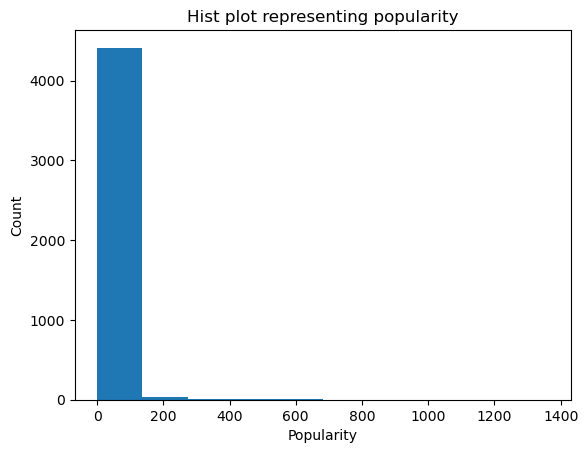

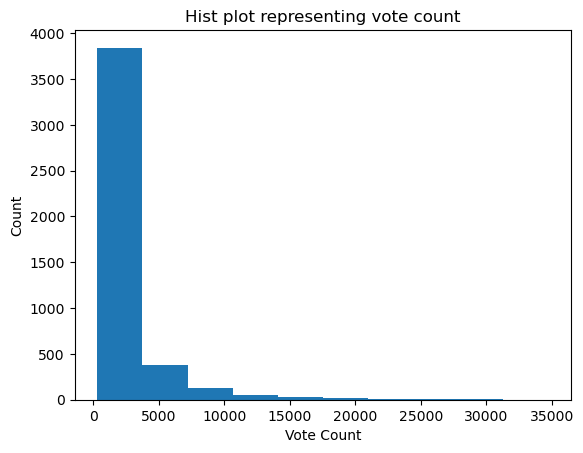

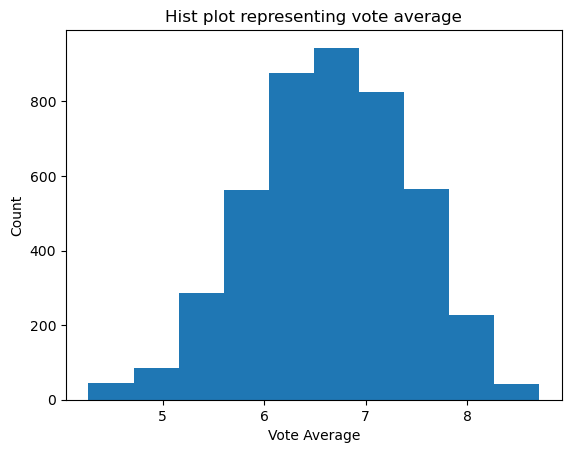

In [19]:
def plot_histogram(data, column, title, xlabel, ylabel):
    plt.hist(data[column])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot histogram for 'popularity'    
plot_histogram(df, 'popularity', 'Hist plot representing popularity', 'Popularity', 'Count')

# Plot histogram for 'vote_count'
plot_histogram(df, 'vote_count', 'Hist plot representing vote count', 'Vote Count', 'Count')

# Plot histogram for 'vote_average'
plot_histogram(df, 'vote_average', 'Hist plot representing vote average', 'Vote Average', 'Count')

1. The attributes popularity and vote_count are heavily right skewed. Looking at the summary statistics it can be said that the attributes popularity and vote_count have many outliers, especially in its upper bound. These attributes have to be analysed in order to understand the extreme values.
2. Vote_average seems to be normally distributed.
3. Since our objective is to classify Genres based on overviews. Hence, Outlier detection and handling  will not be the part of this project. 

#### 4(ii:) Most to least frequent genres

In [20]:
# Assuming genre_counts is already calculated
genre_counts = pd.Series(all_genres).value_counts()

# Create a DataFrame for Plotly
genre_counts_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Map genre IDs to genre names in the DataFrame
genre_counts_df['Genre'] = genre_counts_df['Genre'].map(genre_mapping)

# Plot the pie chart using Plotly Express
fig = px.pie(genre_counts_df, values='Count', names='Genre', title='Genre Distribution',
             labels={'Genre': 'Genre'})

# Customize the layout if needed
fig.update_traces(textinfo='percent+label', pull=[0.1] + [0] * (len(genre_counts_df) - 1))

# Show the plot
fig.show()

A piechart has been plotted to represent the frequency distribution of each genre and based on the plot it can be said that the most frequent genre in our dataset is Drama followed by comedy and thriller.

#### 4 (iii):Top 10 movies based on popularity

Here is a barplot representing top 10 movies based on popularity.

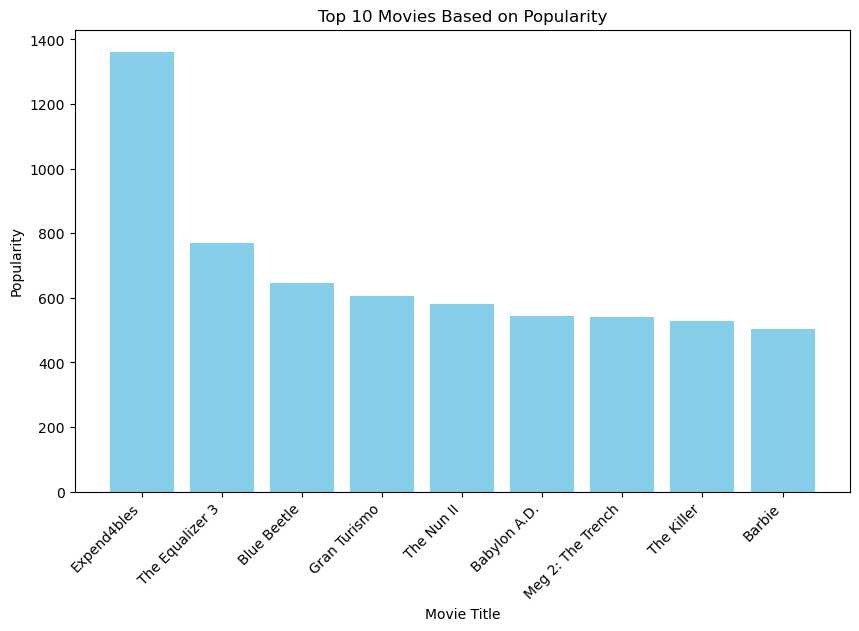

In [21]:
top_10_movies = df.sort_values(by='popularity', ascending=False).head(10)
# Plot the bar chart for the top 10 movies
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies['title'], top_10_movies['popularity'], color='skyblue')
plt.title('Top 10 Movies Based on Popularity')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 4 (iv):Top 10 movies based on vote_count

A bar plot which shows top 10 movies based on vote_count.

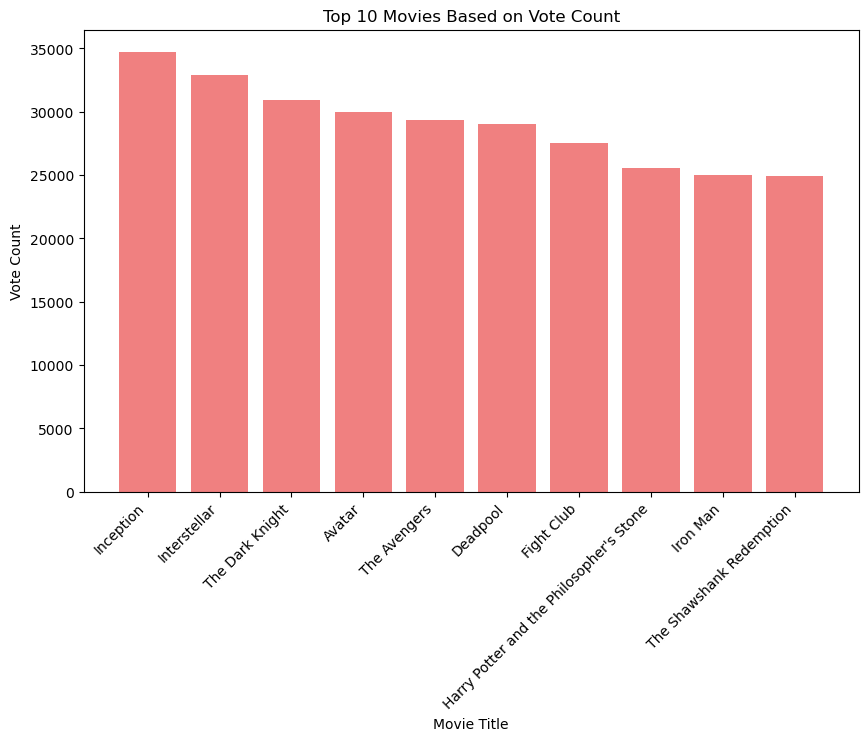

In [22]:
top_10_movies = df.sort_values(by='vote_count', ascending=False).head(10)
# Plot the bar chart for the top 10 movies
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies['title'], top_10_movies['vote_count'], color='lightcoral')
plt.title('Top 10 Movies Based on Vote Count')
plt.xlabel('Movie Title')
plt.ylabel('Vote Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

#### 4 (v): Top 10 movies based on vote_average

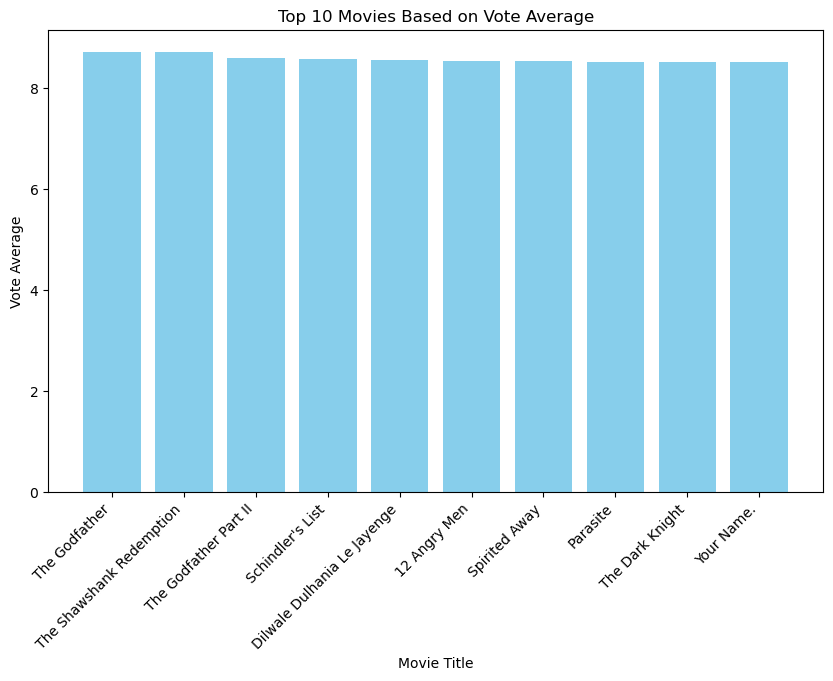

In [23]:
top_10_movies_avg = df.sort_values(by='vote_average', ascending=False).head(10)

# Plot the bar chart for the top 10 movies based on vote average
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies_avg['title'], top_10_movies_avg['vote_average'], color='skyblue')
plt.title('Top 10 Movies Based on Vote Average')
plt.xlabel('Movie Title')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right')
plt.show()


List of top 10 movies have been retrieved based on popularity, vote_count and vote_average and an intresting observation can be made. All three plots have completely different set of movies. This indicates that  popularity, vote_count and vote_average are completely distinct features. 
1. popularity refers to how widely accepted the movie is.
2. Vote_count refers to the total number of votes the movie got.
3. vote_average is nothing but average of the all the votes given to the movie.

We can dig deeper and look find out the relationship between these attributes. 


#### 4(vi) In which year highest number of movies were released?

A line chart has been plotted to show which years have the highest released movies.

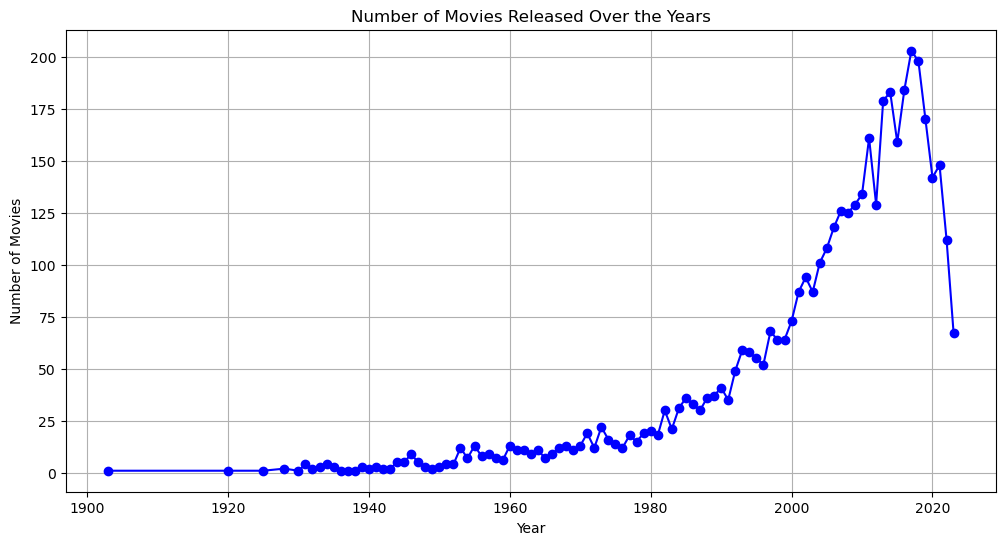

In [24]:
movies_per_year = df['year'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Over 1900's the amount of films being released increased every year and the the year which had highest number of movies released was 2017 followed by 2018, 2016 and so on.

#### 4 (vii): Which years were the highly popular movies released?

In [25]:
df[df['popularity']> 200]

title  \
46      Puss in Boots: The Last Wish   
145   Guardians of the Galaxy Vol. 3   
153                     Gran Turismo   
157          Spider-Man: No Way Home   
299             John Wick: Chapter 4   
329      The Super Mario Bros. Movie   
353                        Elemental   
357       Killers of the Flower Moon   
744                  The Equalizer 3   
1118                          Barbie   
1158                      Talk to Me   
1414                     The Creator   
1551                     Blue Beetle   
1676                      The Nun II   
1743                      The Killer   
1788                      The Killer   
1834                       The Flash   
1860            A Haunting in Venice   
1993               Meg 2: The Trench   
2597              The Little Mermaid   
2633                     Expend4bles   
2804                Zero Fucks Given   
4056                    Babylon A.D.   
4172               Texas Chainsaw 3D   

                                               overview  \
46    Puss in Boots discovers that his passion for a...   
145   Peter Quill, still reeling from the loss of Ga...   
153   The ultimate wish-fulfillment tale of a teenag...   
157   Peter Parker is unmasked and no longer able to...   
299   With the price on his head ever increasing, Jo...   
329   While working underground to fix a water main,...   
353   In a city where fire, water, land and air resi...   
357   When oil is discovered in 1920s Oklahoma under...   
744   Robert McCall finds himself at home in Souther...   
1118  Barbie and Ken are having the time of their li...   
1158  When a group of friends discover how to conjur...   
1414  Amid a future war between the human race and t...   
1551  Recent college grad Jaime Reyes returns home f...   
1676  In 1956 France, a priest is violently murdered...   
1743  After a fateful near-miss, an assassin battles...   
1788  After a fateful near-miss, an assassin battles...   
1834  When his attempt to save his family inadverten...   
1860  Celebrated sleuth Hercule Poirot, now retired ...   
1993  An exploratory dive into the deepest depths of...   
2597  The youngest of King Triton’s daughters, and t...   
2633  Armed with every weapon they can get their han...   
2804  Cassandre, 26, is a flight attendant for a low...   
4056  A veteran-turned-mercenary is hired to take a ...   
4172  A young woman learns that she has inherited a ...   

                                              genre_ids  popularity  \
46    [Adventure, Fantasy, Animation, Comedy, Family...     248.061   
145                [Science Fiction, Adventure, Action]     261.597   
153                          [Adventure, Action, Drama]     606.191   
157                [Action, Adventure, Science Fiction]     271.904   
299                           [Action, Thriller, Crime]     360.324   
329     [Animation, Family, Adventure, Fantasy, Comedy]     391.335   
353       [Animation, Comedy, Family, Fantasy, Romance]     474.382   
357                             [Crime, Drama, History]     212.177   
744                           [Action, Thriller, Crime]     770.584   
1118                       [Comedy, Adventure, Fantasy]     504.875   
1158                                 [Horror, Thriller]     326.555   
1414                [Science Fiction, Action, Thriller]     415.404   
1551               [Action, Science Fiction, Adventure]     646.083   
1676                        [Horror, Mystery, Thriller]     581.629   
1743                                  [Crime, Thriller]     528.720   
1788                                  [Crime, Thriller]     528.720   
1834               [Action, Adventure, Science Fiction]     320.642   
1860                         [Mystery, Thriller, Crime]     205.299   
1993                  [Action, Science Fiction, Horror]     540.988   
2597              [Adventure, Family, Fantasy, Romance]     245.539   
2633                      [Action, Adventure, Thriller]    1362

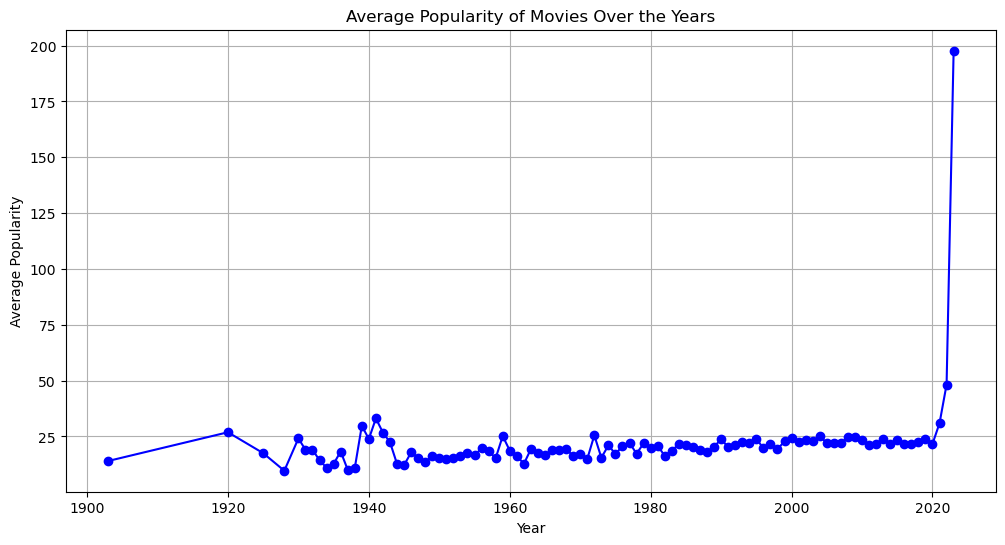

In [26]:
popularity_by_year = df.groupby('year')['popularity'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(popularity_by_year.index, popularity_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Popularity of Movies Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

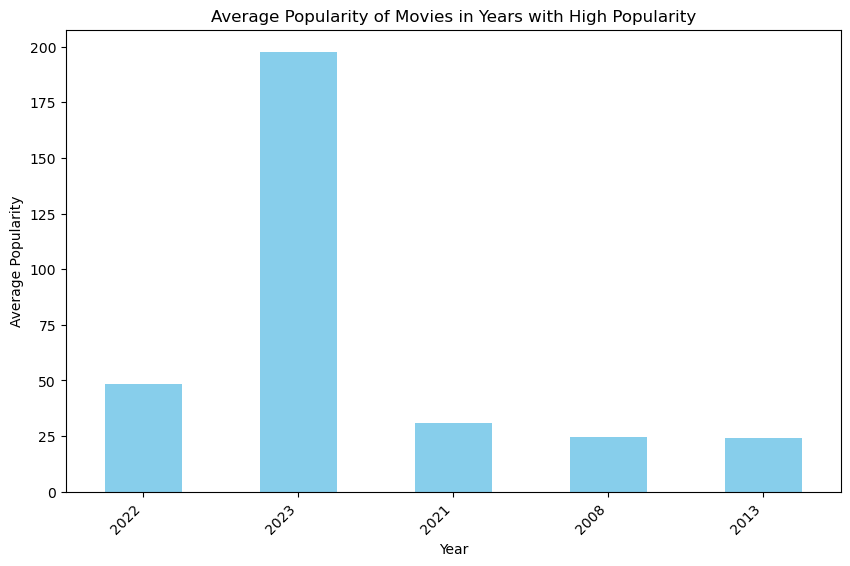

In [27]:
# Set a popularity threshold
popularity_threshold = 200

# Filter years based on the popularity threshold
high_popularity_years = df[df['popularity'] > popularity_threshold]['year'].unique()

# Group by 'year' and calculate the mean popularity for each year
popularity_by_year = df.groupby('year')['popularity'].mean()

# Filter the data for only high popularity years
popularity_by_year_high = popularity_by_year.loc[high_popularity_years]

# Plot the bar chart
plt.figure(figsize=(10, 6))
popularity_by_year_high.plot(kind='bar', color='skyblue')
plt.title('Average Popularity of Movies in Years with High Popularity')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  
plt.show()

1. Movies with popularity score more than 200 are considered highly popular movies.
2. Both the features popularity and the year have been grouped.
3. As per the results obtained it can be observed that even though highest number of movies were released in the year 2017. The most popular films have been released in the year 2023 followed by 2022 and 2021.

#### 4 (viii) which month has highest number of releases?

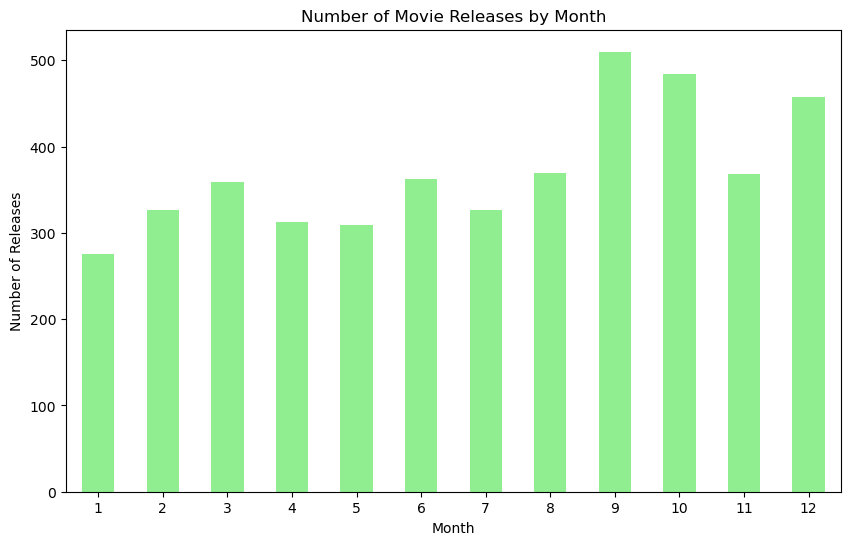

In [28]:
# Count the number of releases for each month
releases_per_month = df['month'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
releases_per_month.plot(kind='bar', color='lightgreen')
plt.title('Number of Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Year ending is the time when the highest number of movies are released. The highest number of movies are released in the months september followed october, november and december.

#### 4(ix) Relationship between popularity and vote_count

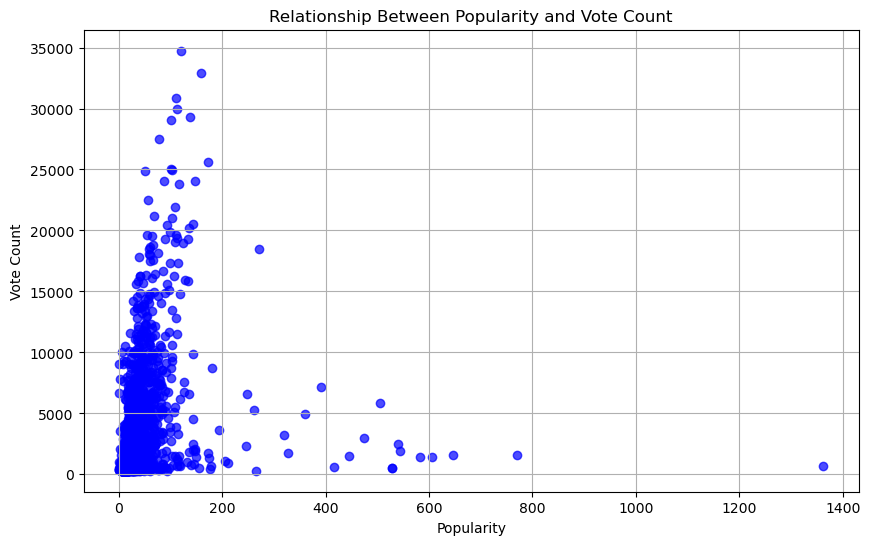

In [29]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['vote_count'], c='blue', alpha=0.7)
plt.title('Relationship Between Popularity and Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

In [30]:
df[df['popularity']>200]

title  \
46      Puss in Boots: The Last Wish   
145   Guardians of the Galaxy Vol. 3   
153                     Gran Turismo   
157          Spider-Man: No Way Home   
299             John Wick: Chapter 4   
329      The Super Mario Bros. Movie   
353                        Elemental   
357       Killers of the Flower Moon   
744                  The Equalizer 3   
1118                          Barbie   
1158                      Talk to Me   
1414                     The Creator   
1551                     Blue Beetle   
1676                      The Nun II   
1743                      The Killer   
1788                      The Killer   
1834                       The Flash   
1860            A Haunting in Venice   
1993               Meg 2: The Trench   
2597              The Little Mermaid   
2633                     Expend4bles   
2804                Zero Fucks Given   
4056                    Babylon A.D.   
4172               Texas Chainsaw 3D   

                                               overview  \
46    Puss in Boots discovers that his passion for a...   
145   Peter Quill, still reeling from the loss of Ga...   
153   The ultimate wish-fulfillment tale of a teenag...   
157   Peter Parker is unmasked and no longer able to...   
299   With the price on his head ever increasing, Jo...   
329   While working underground to fix a water main,...   
353   In a city where fire, water, land and air resi...   
357   When oil is discovered in 1920s Oklahoma under...   
744   Robert McCall finds himself at home in Souther...   
1118  Barbie and Ken are having the time of their li...   
1158  When a group of friends discover how to conjur...   
1414  Amid a future war between the human race and t...   
1551  Recent college grad Jaime Reyes returns home f...   
1676  In 1956 France, a priest is violently murdered...   
1743  After a fateful near-miss, an assassin battles...   
1788  After a fateful near-miss, an assassin battles...   
1834  When his attempt to save his family inadverten...   
1860  Celebrated sleuth Hercule Poirot, now retired ...   
1993  An exploratory dive into the deepest depths of...   
2597  The youngest of King Triton’s daughters, and t...   
2633  Armed with every weapon they can get their han...   
2804  Cassandre, 26, is a flight attendant for a low...   
4056  A veteran-turned-mercenary is hired to take a ...   
4172  A young woman learns that she has inherited a ...   

                                              genre_ids  popularity  \
46    [Adventure, Fantasy, Animation, Comedy, Family...     248.061   
145                [Science Fiction, Adventure, Action]     261.597   
153                          [Adventure, Action, Drama]     606.191   
157                [Action, Adventure, Science Fiction]     271.904   
299                           [Action, Thriller, Crime]     360.324   
329     [Animation, Family, Adventure, Fantasy, Comedy]     391.335   
353       [Animation, Comedy, Family, Fantasy, Romance]     474.382   
357                             [Crime, Drama, History]     212.177   
744                           [Action, Thriller, Crime]     770.584   
1118                       [Comedy, Adventure, Fantasy]     504.875   
1158                                 [Horror, Thriller]     326.555   
1414                [Science Fiction, Action, Thriller]     415.404   
1551               [Action, Science Fiction, Adventure]     646.083   
1676                        [Horror, Mystery, Thriller]     581.629   
1743                                  [Crime, Thriller]     528.720   
1788                                  [Crime, Thriller]     528.720   
1834               [Action, Adventure, Science Fiction]     320.642   
1860                         [Mystery, Thriller, Crime]     205.299   
1993                  [Action, Science Fiction, Horror]     540.988   
2597              [Adventure, Family, Fantasy, Romance]     245.539   
2633                      [Action, Adventure, Thriller]    1362

It can be observed that the movies with high popularity count have lower vote_count. Movies such as Barbie, Gran Turismo, Babylon A.D., Texas Chainsaw 3D and many more, these moving have an incredible popularity score but have lower vote_count. This represents that even though certain movies are highly popular they are liked by lower set of audience. 

#### 4(x) Relationship between popularity and vote_average

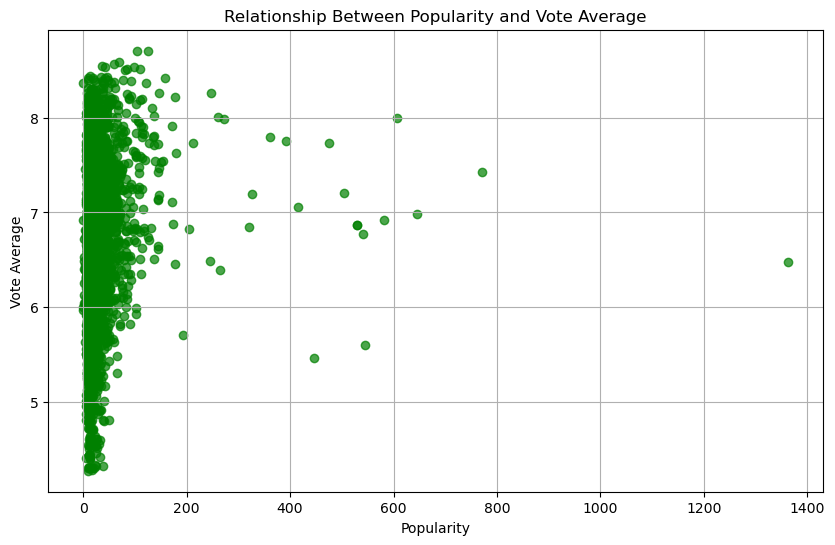

In [31]:
# Scatter plot for Popularity and Vote Average
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['vote_average'], c='green', alpha=0.7)
plt.title('Relationship Between Popularity and Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()


In [32]:
df[df['popularity']>1200]

title                                           overview  \
2633  Expend4bles  Armed with every weapon they can get their han...   

                          genre_ids  popularity release_date  vote_average  \
2633  [Action, Adventure, Thriller]    1362.272   2023-09-15         6.475   

      vote_count                             cleaned_overview_movie  year  \
2633         702  armed every weapon get hand skill use expendab...  2023   

      month  
2633      9

Popular movies with scores ranging from  200 - 800 have an vote_average lying between 6 - 7. The popularity of the movie does not necessarily determine the success of the movie. There are few exceptions where it can be observed that a movie with popularity score more than 1200 has an average vote of 6.5. This indicates that movies which are popular might not necessarily have higher average_vote.

#### 4(xi) Which genres have highest vote_counts? 

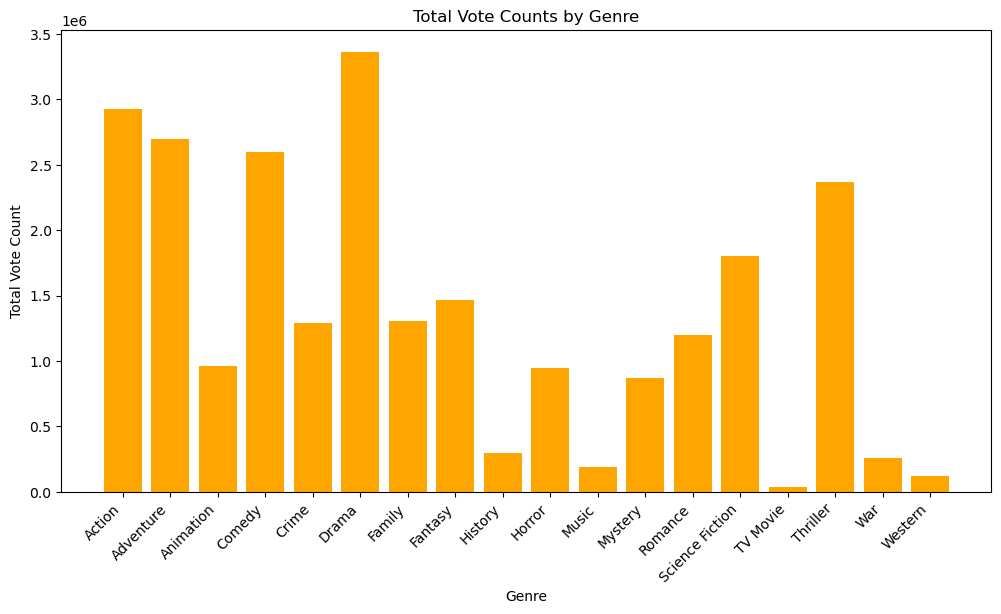

In [33]:
# Explode the 'genre_ids' column to separate rows for each genre
df_exploded = df.explode('genre_ids')

# Group by genre and calculate the sum of vote counts
genre_vote_counts = df_exploded.groupby('genre_ids')['vote_count'].sum().reset_index()

# Plot the bar chart for genre and vote counts
plt.figure(figsize=(12, 6))
plt.bar(genre_vote_counts['genre_ids'], genre_vote_counts['vote_count'], color='orange')
plt.title('Total Vote Counts by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Vote Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Genre has been grouped with vote_count in order to find the genres with highest vote_count and it can be observed that the
Drama followed by Action, Adventure, comedy and thriller have highest vote_counts. These are genere which are most liked by the people.

#### 4(xii): correlation analysis:

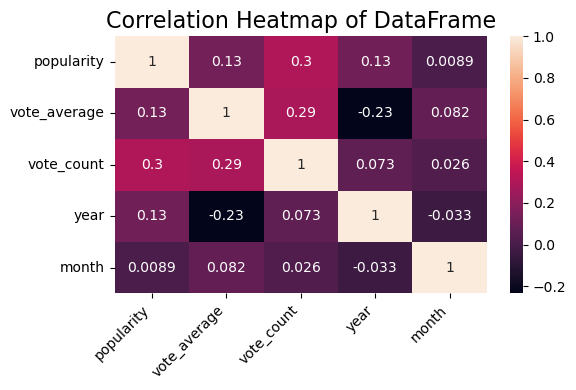

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True)

# Add title and adjust plot appearance
plt.title('Correlation Heatmap of DataFrame', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

A heat map has been plotted to look at the correlation among the features and it can be observed that the attributes have weak correlation among themselves. A positive yet weak correlation is found between features 'vote_count' and 'popularity'. on the other hand 'year' and 'vote_average' have negative corelation.

## ------------------------------------------------------------------------------------------------------------------------------------

An extensive EDA has been performed in order to understand the distribution/skewness of the data using histograms and scatter plots, furthermore the data was visulaized using barplots. Corelation Analysis has been performed using the pearsons corelation. Since the target variable has multiple labels the data has been transformed into 1's and 0's using MultiLabelBinarizer. 

#### 5. Data transformation

This step involves converting the column genre-id to numeric format(0's and 1's) for easy analysis. Since we have multiple labels in this particular attribute we use MultiLabelBinarizer. The result of this operation is a numpy array were each movie is given a label of '1' or '0' as per its genre.

If a movie has the genre associated to it as 'Action' and 'Adventure' multilabelclassifier puts a 1 for the instances 'Action' and 'Adventure' and puts a zero for all the other genres.

In [35]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['genre_ids'])

# transform target variable
y = multilabel_binarizer.transform(df['genre_ids'])

In [36]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

## -------------------------------------------------------------------------------------------------------------------------------------

#### 6. Word vectorization:
Two word vectorization methods have been used bag-of-words and TFIDF. The reason behind using these methods is to convert the text present in the overview column to numeric format. Word cloud representation have been built based on two vectorization techniques.

The data has splitted into train and test prior to applying word vectorization techniques to avoid data leakage. The model will get an exposure to unseen data if the train test split was done after performing BOW or TFIDF. 

#### 6 (i) Bag of words

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_overview_movie'], y, test_size=0.2, random_state=9)

In [38]:
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(x_train)
# Transform the testing data using the same vectorizer
X_test_bow = count_vectorizer.transform(x_test)

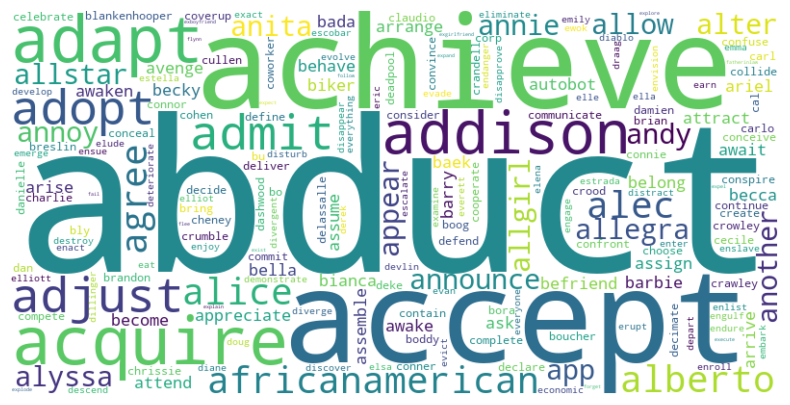

In [39]:
X_combined_bow = scipy.sparse.vstack([X_train_bow, X_test_bow])

# Convert the bag of words to text
feature_names = count_vectorizer.get_feature_names_out()
text = ' '.join([word for word, count in zip(feature_names, X_combined_bow.sum(axis=0).A1)])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 6(ii): TFIDF:

In [40]:
# create TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

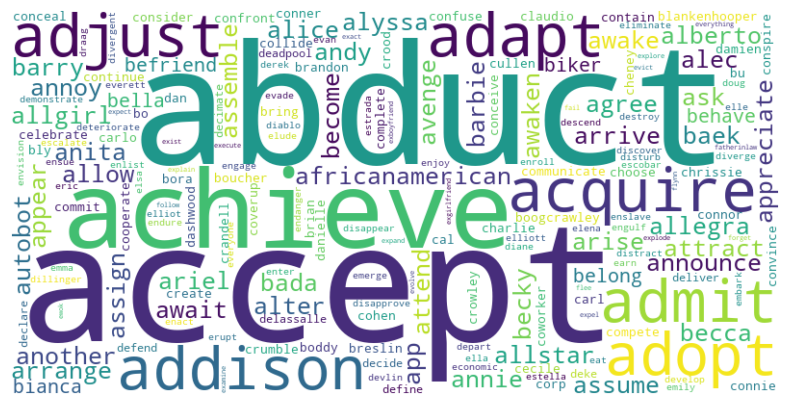

In [41]:
X_combined_tfidf = scipy.sparse.vstack([X_train_tfidf, X_test_tfidf])

# Convert the TF-IDF features to text
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
text_tfidf = ' '.join([word for word, score in zip(feature_names_tfidf, X_combined_tfidf.sum(axis=0).A1)])

# Generate Word Cloud for TF-IDF
wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate(text_tfidf)

# Display the Word Cloud for TF-IDF
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Comparision:

Looking at the word clouds certain observations can be made.

1. The BOW works by giving importance to the words which occurs more frequently in the documnent. So the representation word cloud represntation for BOW shows us the all the common words present in the document. so it can be observed that the words 'accept', 'abduct', 'addison', 'acquire' and many more have been occurred many times. A word occurring frequently in a document does not imply its importance. However, BOW is a very easy method to convert the text to numeric form.

2. The TFIDF works by giving importance to the words which are unique and appear less times in a document. So, the words 'abduct', 'accept', 'achieve', 'acquire' and 'adapt' (to name a few) are the words which are unique in the document. 

For example: The word 'african american', 'achieve' are more prominent in the TFIDF represntation as compared with BOW. This indicates that TFIDF has given higher importance for this particular words. Few words like 'abduct' and 'accept' look big and prominent in both the representations but TFIDF has downplayed the importance of words compared to BoW.



## --------------------------------------------------------------------------------------------------------------------------------------

#### 7 . Data modelling

We are going to proceed with the data which was vectorized using tfidf vectorizer.

In this step we are going to train our data using different models. A different approach is been used inorder to train the data.
Since this a multi label classification problem where each instance has multiple labels a normal binary classifier cannot fit on the data and cannot classify into multiple instances. Here comes the OnevsRestclassifier which is used in multiclass/multilabel problem which is wrapped on top binary classifiers. This works by fitting one classifier per class and hence the problem is broken into multiple binary classifiers.

Since the dataset is of relatively small size it was not feasible to split the data into train validation and test. So k-fold cross validation is used. This works by creating k folds and training the data on k-1 folds and validates the models performance on the remaining fold. The process is iterated for k times and the results of all iterations are averaged and the mean score is presented. 

The performance of the models are evaluated based on F1-score. F1 score provides a balance between false positives and false negatives making it more robust in the presence of class imbalance.

#### 7(i): Naive-bayes:

In [84]:
# Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
n_clf = OneVsRestClassifier(naive_bayes_classifier)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
y_pred_cv = cross_val_predict(n_clf, X_train_tfidf, y_train, cv=kf)

# Evaluate the model on the entire training dataset
n_clf.fit(X_train_tfidf, y_train)

# Make predictions on the test dataset
y_pred_test = n_clf.predict(X_test_tfidf)

# Calculate metrics for cross-validation
accuracy_cv = accuracy_score(y_train, y_pred_cv)
f1_micro_cv = f1_score(y_train, y_pred_cv, average='micro')
precision_micro_cv = precision_score(y_train, y_pred_cv, average='micro')
recall_micro_cv = recall_score(y_train, y_pred_cv, average='micro')

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_micro_test = f1_score(y_test, y_pred_test, average='micro')
precision_micro_test = precision_score(y_test, y_pred_test, average='micro')
recall_micro_test = recall_score(y_test, y_pred_test, average='micro')

# Print the results
print(f'Cross-Validation Accuracy: {accuracy_cv:.2f}')
print(f'Cross-Validation F1 (micro): {f1_micro_cv:.2f}')
print(f'Cross-Validation Precision (micro): {precision_micro_cv:.2f}')
print(f'Cross-Validation Recall (micro): {recall_micro_cv:.2f}')
print('------------------------------------------------')

print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test F1 (micro): {f1_micro_test:.2f}')
print(f'Test Precision (micro): {precision_micro_test:.2f}')
print(f'Test Recall (micro): {recall_micro_test:.2f}')

Cross-Validation Accuracy: 0.03
Cross-Validation F1 (micro): 0.10
Cross-Validation Precision (micro): 0.76
Cross-Validation Recall (micro): 0.05
------------------------------------------------
Test Accuracy: 0.03
Test F1 (micro): 0.11
Test Precision (micro): 0.77
Test Recall (micro): 0.06


#### Looking at a sample prediction:

In [97]:
#predicted value
y_pred_test[6]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [98]:
#Actual value
y_test[6]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [99]:
#Predicted value
y_pred_test[5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
#Actual value
y_test[5]

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

##### Classification report:

In [96]:
classification_report_test = classification_report(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy_test:.2f}')
print('Test Classification Report:')
print(classification_report_test)

Test Accuracy: 0.03
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.00      0.00      0.00       159
           2       0.00      0.00      0.00        84
           3       0.89      0.12      0.22       318
           4       0.00      0.00      0.00       127
           5       0.75      0.26      0.38       398
           6       0.00      0.00      0.00       108
           7       0.00      0.00      0.00       112
           8       0.00      0.00      0.00        46
           9       0.00      0.00      0.00       116
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        82
          12       0.00      0.00      0.00       146
          13       0.00      0.00      0.00       118
          14       0.00      0.00      0.00        11
          15       0.25      0.00      0.01       249
          16       0.00      0.00

Looking at the results it can be observed that:
1. The accuracy of the model is almost close to zero which indicates that the model has an extreme poor performance. The reason behind accuracy being low is the data has high class imbalance. The data is a sparse matrix where there are a lot of 0's as a result the accuracy of the  model is low. Accuracy alone is not a valid metric in this case to test the performance of model.
2. The Test data has a precision of 77% and f1 score of 11%.The model has highest number of false positives. 
3. A lower F1-score indicates that the model is not performing well in identyfying positive cases and is avoiding false positives.

Overall performnace of this model is low.

#### 7)(ii): Decision Tree

In [85]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
dt_clf = OneVsRestClassifier(decision_tree_classifier)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
y_pred_cv_dt = cross_val_predict(dt_clf, X_train_tfidf, y_train, cv=kf)

# Train the model on the entire training dataset
dt_clf.fit(X_train_tfidf, y_train)

# Make predictions on the test dataset
y_pred_dt = dt_clf.predict(X_test_tfidf)

# Calculate metrics for cross-validation
accuracy_cv_dt = accuracy_score(y_train, y_pred_cv_dt)
f1_micro_cv_dt = f1_score(y_train, y_pred_cv_dt, average='micro')
precision_micro_cv_dt = precision_score(y_train, y_pred_cv_dt, average='micro')
recall_micro_cv_dt = recall_score(y_train, y_pred_cv_dt, average='micro')

# Calculate metrics for the test set
accuracy_test_dt = accuracy_score(y_test, y_pred_dt)
f1_micro_test_dt = f1_score(y_test, y_pred_dt, average='micro')
precision_micro_test_dt = precision_score(y_test, y_pred_dt, average='micro')
recall_micro_test_dt = recall_score(y_test, y_pred_dt, average='micro')

# Print the results
print(f'Cross-Validation Accuracy (Decision Tree): {accuracy_cv_dt:.2f}')
print(f'Cross-Validation F1 (micro) (Decision Tree): {f1_micro_cv_dt:.2f}')
print(f'Cross-Validation Precision (micro) (Decision Tree): {precision_micro_cv_dt:.2f}')
print(f'Cross-Validation Recall (micro) (Decision Tree): {recall_micro_cv_dt:.2f}')

print(f'Test Accuracy (Decision Tree): {accuracy_test_dt:.2f}')
print(f'Test F1 (micro) (Decision Tree): {f1_micro_test_dt:.2f}')
print(f'Test Precision (micro) (Decision Tree): {precision_micro_test_dt:.2f}')
print(f'Test Recall (micro) (Decision Tree): {recall_micro_test_dt:.2f}')

Cross-Validation Accuracy (Decision Tree): 0.03
Cross-Validation F1 (micro) (Decision Tree): 0.41
Cross-Validation Precision (micro) (Decision Tree): 0.42
Cross-Validation Recall (micro) (Decision Tree): 0.40
Test Accuracy (Decision Tree): 0.03
Test F1 (micro) (Decision Tree): 0.42
Test Precision (micro) (Decision Tree): 0.43
Test Recall (micro) (Decision Tree): 0.42


###### Classification report

In [88]:
classification_report_test = classification_report(y_test, y_pred_dt)
print(f'Test Accuracy: {accuracy_test:.2f}')
print('Test Classification Report:')
print(classification_report_test)

Test Accuracy: 0.03
Test Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42       199
           1       0.41      0.33      0.37       159
           2       0.24      0.21      0.23        84
           3       0.49      0.56      0.52       318
           4       0.39      0.39      0.39       127
           5       0.53      0.54      0.54       398
           6       0.38      0.32      0.35       108
           7       0.31      0.31      0.31       112
           8       0.15      0.09      0.11        46
           9       0.43      0.41      0.42       116
          10       0.26      0.28      0.27        25
          11       0.12      0.11      0.11        82
          12       0.41      0.37      0.39       146
          13       0.57      0.46      0.51       118
          14       0.09      0.09      0.09        11
          15       0.44      0.49      0.46       249
          16       0.24      0.19

#### Looking at a sample prediction

In [94]:
y_pred_dt[6]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [95]:
y_test[6]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Looking at the results it can be observed that:
1. The accuracy of the test set is very poor. 
2. The f1 score is 0.42. A value of 0.42 shows a moderate balance between precision and recall. It considers overall precision and recall across all classes.
3. There is very less data for the class 14, 16 and 17 making it difficult for the model to learn patterns for these classes.
3. The decision tree model has some predictive ability, but the overall performance of the model is still low.

#### 7(iii): Random Forest

In [87]:
# Create a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
rf_clf = OneVsRestClassifier(random_forest_classifier)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
y_pred_cv_rf = cross_val_predict(rf_clf, X_train_tfidf, y_train, cv=kf)

# Train the model on the entire training dataset
rf_clf.fit(X_train_tfidf, y_train)

# Make predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test_tfidf)

# Calculate metrics for cross-validation
accuracy_cv_rf = accuracy_score(y_train, y_pred_cv_rf)
f1_micro_cv_rf = f1_score(y_train, y_pred_cv_rf, average='micro')
precision_micro_cv_rf = precision_score(y_train, y_pred_cv_rf, average='micro')
recall_micro_cv_rf = recall_score(y_train, y_pred_cv_rf, average='micro')

# Calculate metrics for the test set
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)
f1_micro_test_rf = f1_score(y_test, y_pred_rf, average='micro')
precision_micro_test_rf = precision_score(y_test, y_pred_rf, average='micro')
recall_micro_test_rf = recall_score(y_test, y_pred_rf, average='micro')

# Print the results
print(f'Cross-Validation Accuracy (Random Forest): {accuracy_cv_rf:.2f}')
print(f'Cross-Validation F1 (micro) (Random Forest): {f1_micro_cv_rf:.2f}')
print(f'Cross-Validation Precision (micro) (Random Forest): {precision_micro_cv_rf:.2f}')
print(f'Cross-Validation Recall (micro) (Random Forest): {recall_micro_cv_rf:.2f}')

print(f'Test Accuracy (Random Forest): {accuracy_test_rf:.2f}')
print(f'Test F1 (micro) (Random Forest): {f1_micro_test_rf:.2f}')
print(f'Test Precision (micro) (Random Forest): {precision_micro_test_rf:.2f}')
print(f'Test Recall (micro) (Random Forest): {recall_micro_test_rf:.2f}')

Cross-Validation Accuracy (Random Forest): 0.06
Cross-Validation F1 (micro) (Random Forest): 0.27
Cross-Validation Precision (micro) (Random Forest): 0.69
Cross-Validation Recall (micro) (Random Forest): 0.16
Test Accuracy (Random Forest): 0.06
Test F1 (micro) (Random Forest): 0.33
Test Precision (micro) (Random Forest): 0.71
Test Recall (micro) (Random Forest): 0.21


###### Classification report

In [89]:
classification_report_test = classification_report(y_test, y_pred_rf)
print(f'Test Accuracy: {accuracy_test:.2f}')
print('Test Classification Report:')
print(classification_report_test)

Test Accuracy: 0.03
Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.15      0.25       199
           1       0.80      0.05      0.09       159
           2       1.00      0.01      0.02        84
           3       0.66      0.37      0.48       318
           4       0.88      0.12      0.21       127
           5       0.68      0.44      0.54       398
           6       0.89      0.07      0.14       108
           7       0.71      0.04      0.08       112
           8       0.00      0.00      0.00        46
           9       0.85      0.15      0.25       116
          10       0.00      0.00      0.00        25
          11       0.83      0.06      0.11        82
          12       0.84      0.11      0.19       146
          13       0.97      0.25      0.40       118
          14       0.00      0.00      0.00        11
          15       0.64      0.28      0.39       249
          16       0.00      0.00

Looking at the data it can be observed:
1. As mentioned previously the accuracy of the model is very low.
2. The F1 score of the model random forest is 0.33 which is less than the score obtained by decision tree.
3. There is reasonable balance between precision and recall across all classes. It can be observed that the f1 score is almost 0 for the classes which have low support values(14,16,17 andd 8).
4. Classes with low precision values (8, 10, 14, 16, 17) indicate challenges in making accurate positive predictions.
5. It is extremely important for us to handle class imbalance.

## -------------------------------------------------------------------------------------------------------------------------------------

#### 8. Results of analysis:

##### Results obtained from data cleaning:
1. Every attribute in the dataset underwent some sort of cleaning. For example the column overview has been cleaned in order to remove stopwords, punctuations, numbers and converting the text to the root form i.e performing lemmatization. The result of this operation is a cleaned text.
2. The column 'Genre_ids' were mapped with the original values. The 'release_date' column was converted to the date time format.
3. 2 new features have been created out of 'release_date' which are 'year' and 'month'.

###### Results obtained from EDA:

An extensive EDA has been performed and few insights have been generated based on EDA:

1. The numeric columns 'Popularity' and 'Average_count' are right skewed. This represents that the data indeed has many outliers.
2. Most frequent genres in the dataset are 'drama', 'action' and 'comedy'.
3. Bar plots have been plotted to get the top 10 movies based on 'popularity', 'vote_average' and 'vote_count'. And based on the bar plots it can be observed that all the 3 plots have completely different set of movies. This tells us that 'popularity', 'vote_count' and 'vote_average' are all distinct features.
3. The highest number of movies were released in the year '2017'. However, the most popular movies were released in the year '2023' followed by '2022' and '2021'.
4. The movies which have high popularity rating does not necessarily mean that the movie will have highest vote_counts.
5. On an average the 'vote_average' of a movie lie between 6-7.
6. The genres which have highest vote_count are 'Drama' followed by 'Action' and 'Adventure'.
7. The correlation analysis shows us that there is a low to moderate positive aswell as negative correlation between the features.

##### Results based on Data Transformation:

1. The 'Genre_ids' have been transformed using MultiLabelBinarizer and the resultant of this operation is a numpy matrix with all the encoded values.

##### Results based on Word Vectorization:

1. BOW and TFIDF are two methods which were used as a part of this project. BOW representations gives importance to the words which occur more frequently in a document. On the other hand, TFDIF gives importance to the words which are unique and which occurs less times in a document. The result obtained strongly suggest that the more suitable method for our project is TFIDF.

##### Results based on Data Modelling:

1. The data has huge class imbalance. 
2. Three models were used 'Naive-bayes' , 'Decision-tree' and 'Random-forest'. All the three classifiers had a very bad accuracy of 0.03. This is due to class imbalance as mentioned previously.
3. However, the metric F1-score was used to evaluate the performance of the model. 'Decision-Tree' had the highest F1-score 0.43. while the random-forest had F1-score of 0.33 and Naive-bayes having F1-score as 0.11.
4. So to conclude, The decision tree model has some predictive ability. The f1-score obtained for this classifier shows a moderate balance between precision and recall.

## --------------------------------------------------------------------------------------------------------------------------------------

#### 9. Conclusions/Future Work

To conclude, the project classifies the genre based on the overview of the movies.

1. Data cleaning and EDA were performed successfully. We ensured that the data was clean enough for the model to perform analysis.
2. An extensive EDA has been perform in order to understand the intresting patterns, corelations and insights from the dataset.

However, for few aspects there is a huge scope of imporvement.

1. The word vectorization techniques used are pretty basic. Both the techniques lack context awareness. BOW creates a huge sparse matrix when the vocabulary is large. Instead, more advanced vectorization methods can be used such as Word2Vec, GloVe and BERT can be used. 
2. There is a huge class imbalance in the dataset. Target variable is a sparse matrix with a lot of 0's. Due to this nature of the target variable the models have a poor performance. The class imbalance should be handled using proper techniques such as SMOTE, oversampling or undersampling. 
3. Overall decision tree gave us a moderate performance. Other advanced algorithms such as xgboot, Gradientboost can be used in order to to boost the scores.

## ----------------------------------

#### 10. References:

1. Joshi, P.(2022, July 19). Predicting Movie Genres using NLP – An Awesome Introduction to Multi-Label Classification. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/
2. https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
3. Agarwal, A( 2020, August 7). Movie Genre Classifier using Natural Language Processing. Medium. https://medium.com/@aagarwal691/movie-genre-classifier-using-natural-language-processing-4d5e73da7b78
4. Silvan(2019, September 23). Using NLP to Find Similar Movies Based on Plot Summaries. Towards Data Science. https://towardsdatascience.com/using-nlp-to-find-similar-movies-based-on-plot-summaries-b1481a2ba49b
5. Pandian, S(2023, November 17). K-Fold Cross Validation Technique and its Essentials. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/